Installing Libraries

In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Softmax
from tensorflow.keras.models import Sequential

Loading Data and rescaling it

In [5]:
dataset=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=dataset.load_data()
x_train=x_train/255.0
x_test=x_test/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
print(f"Dimension of MNIST Dataset={x_train.ndim}")
print(f"Shape of MNIST Dataset={x_train.shape}")

Dimension of MNIST Dataset=3
Shape of MNIST Dataset=(60000, 28, 28)


Adding new Axis to dataset

In [8]:
x_train=x_train[...,np.newaxis]
x_test=x_test[...,np.newaxis]

Building Model, I used a CNN accompanied with 2

In [10]:
model=Sequential([
                  Conv2D(filters=8,kernel_size=(3,3),activation='relu',input_shape=x_train[0].shape),
                  MaxPooling2D(pool_size=(2,2)),
                  Flatten(),
                  Dense(64,activation='relu'),
                  Dense(64,activation='relu'),
                  Dense(10,activation='softmax'),
             
  ])

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Training Model

In [13]:
history=model.fit(x_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9377 - loss: 0.2137
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9772 - loss: 0.0749
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9839 - loss: 0.0517
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9875 - loss: 0.0397
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9909 - loss: 0.0295
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9920 - loss: 0.0239
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9938 - loss: 0.0190
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9949 - loss: 0.0148
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9958 - loss: 0.0126
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9966 - loss: 0.0107


In [14]:
result=pd.DataFrame(history.history)
result

,accuracy,loss
0,0.937683,0.213669
1,0.977200,0.074869
2,0.983917,0.051692
3,0.987467,0.039705
4,0.990883,0.029512
5,0.991983,0.023943
6,0.993783,0.019026
7,0.994900,0.014806
8,0.995750,0.012585
9,0.996567,0.010686


Plotting graph

Text(0.5, 1.0, 'epoch vs loss')

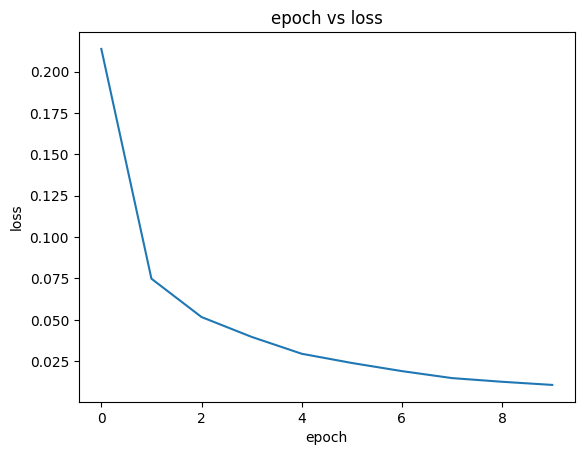

In [19]:
plt.plot(result['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('epoch vs loss')

Text(0.5, 1.0, 'epoch vs accuracy')

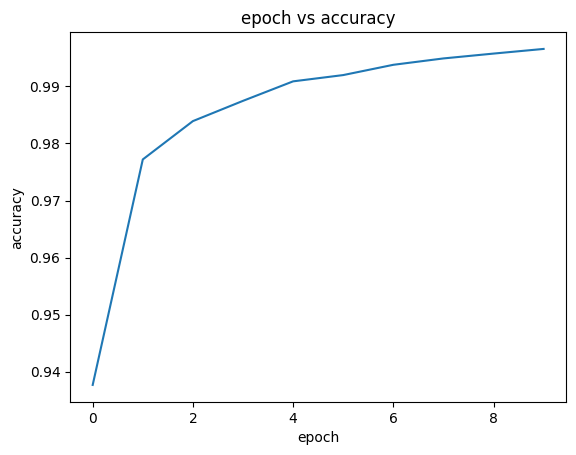

In [20]:
plt.plot(result['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('epoch vs accuracy')

In [21]:
model.evaluate(x_test,y_test,batch_size=32,verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9816 - loss: 0.0809


[0.08086895942687988, 0.9815999865531921]

In [22]:
b=x_test.shape[0]
x=np.random.choice(b,4)
x

array([7845,   11, 1907,  861])

In [23]:
y=x_test[x,...]
d=y_test[x,...]
prediction=model.predict(y)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[2.2784374e-05, 3.6665829e-10, 2.9352559e-10, 1.7173010e-09,
        6.4821140e-09, 1.2214236e-06, 6.2829530e-10, 2.9310365e-07,
        9.9996406e-01, 1.1720966e-05],
       [3.1777888e-14, 1.7428826e-18, 2.4260091e-19, 3.2191162e-20,
        8.2433263e-18, 3.8389034e-14, 1.0000000e+00, 2.8192389e-18,
        2.0245037e-18, 1.4014414e-23],
       [1.0000000e+00, 1.6408565e-11, 5.6146365e-10, 1.7894739e-13,
        1.7403806e-15, 8.9325187e-09, 4.9870074e-08, 2.1745376e-10,
        1.2382145e-08, 3.9901884e-08],
       [1.2986831e-11, 1.1679813e-12, 5.5121225e-14, 1.5443804e-13,
        4.5426840e-10, 1.4367945e-09, 1.0000000e+00, 1.6844315e-13,
        8.6559926e-13, 8.9306898e-14]], dtype=float32)

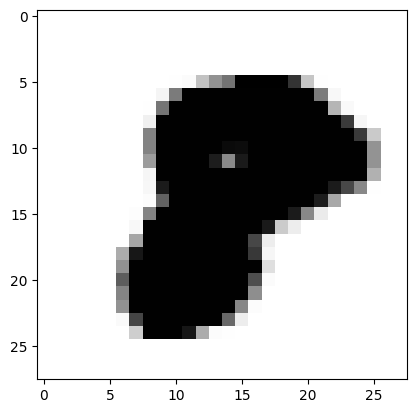

In [24]:
plt.imshow(y[0].reshape(28,28),cmap='Greys')

In [28]:
print(d[0])
print(prediction[0][8])

8
0.99996406


In [33]:
import cv2

In [51]:
img = cv2.imread("Screenshot 2026-01-01 at 9.45.00 PM.png", cv2.IMREAD_GRAYSCALE)

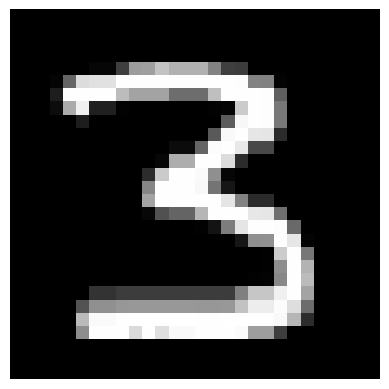

In [52]:
img = cv2.resize(img,(28,28))
plt.imshow(img,cmap='grey')
plt.axis('off')
plt.show()

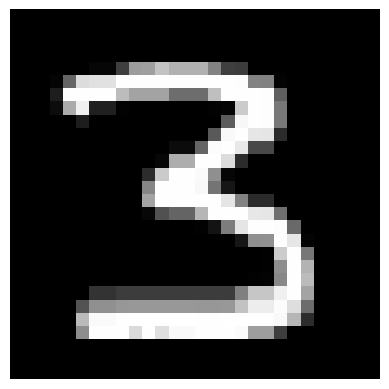

In [53]:
img = img/255
plt.imshow(img,cmap='grey')
plt.axis('off')
plt.show()

In [54]:
img_pred = model.predict(img[:,:][np.newaxis, ..., np.newaxis])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [56]:
np.argmax(img_pred)

3